In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

In [5]:
movies= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\movies.csv", sep = "::",
                   names = ["movieId", "title", "genres"])
movies = movies.assign(genres= movies.genres.str.split("|", expand = True).iloc[:,:1])
movies["genres"]= movies["genres"].str.replace('[{}]'.format(string.punctuation), '')
movies.genres = movies.genres.astype("category")


movies.genres = movies.genres.cat.rename_categories({ "Action": 0, "Adventure":1, "Animation": 2, "Childrens": 3, "Comedy": 4, "Crime":5, "Documentary":6, "Drama":7, "Fantasy":8,
                                                      "FilmNoir": 9, "Horror":10, "Musical":11, "Mystery":12 , "Romance":13, "SciFi": 14, "Thriller": 15, "War":16, "Western":17})


movies["movieId"]= movies["movieId"].str.replace('[{}]'.format(string.punctuation), '')
movies["movieId"]= movies["movieId"].astype(int)

ratings= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\ratings.csv", sep = "::", 
                    names = ["userId", "movieId", "ratings", "timestamp"])
ratings = pd.merge(ratings, movies, how="inner", on="movieId")

users= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\users.csv", sep = "::",
                  names = ["userId", "gender", "age", "occupation", "zipcode"])

test_rating_data = pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\ratings.csv", sep = "::",
                    names = ["userId", "movieId", "ratings", "timestamp"])



C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\672936858.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\movies.csv", sep = "::",
C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\672936858.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movies["genres"]= movies["genres"].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\672936858.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  movies["movieId"]= movies["movieId"].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\672936858.py:15: ParserWarning: Falling back to the '

In [6]:
data_per_user = 250
wathed_data_size = 250
negative_size = 5 # big: 2-5 / small: 5-20

In [7]:
train_dataset = pd.merge(users[['userId','age','gender', "occupation"]], ratings[['userId','movieId','ratings', "genres"]][ratings.ratings >= 4], on='userId')


train_dataset = train_dataset.groupby('userId', group_keys=False).apply(
    lambda x : x.sample(n=data_per_user).reset_index(drop=True)
    if len(x) >= data_per_user
    else x.reset_index(drop=True))

train_dataset['watched_movies'] = train_dataset['userId'].apply(
    lambda x : ratings[ratings.userId == x]['movieId'].sample(n=wathed_data_size).tolist()
    if len(ratings[ratings.userId == x]['movieId'])>= wathed_data_size
    else ratings[ratings.userId == x]['movieId'].tolist())

    
train_dataset['watched_genres'] = train_dataset['userId'].apply(
    lambda x : ratings[ratings.userId == x]['genres'].sample(n=wathed_data_size).tolist()
    if len(ratings[ratings.userId == x]['genres'])>= wathed_data_size
    else ratings[ratings.userId == x]['genres'].tolist())

train_dataset['negative_samples'] = np.random.choice(len(movies)+1, (len(train_dataset),negative_size)).tolist() 
train_dataset.head()

,userId,age,gender,occupation,movieId,ratings,genres,watched_movies,watched_genres,negative_samples
0,2,56,M,16,1193,5,7,"[1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...","[7, 7, 4, 7, 7, 0, 7, 7, 7, 4, 7, 0, 0, 5, 0, ...","[2603, 3020, 804, 1956, 1848]"
1,2,56,M,16,3105,4,7,"[1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...","[7, 7, 4, 7, 7, 0, 7, 7, 7, 4, 7, 0, 0, 5, 0, ...","[2956, 2342, 3626, 3703, 2368]"
2,2,56,M,16,1962,5,7,"[1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...","[7, 7, 4, 7, 7, 0, 7, 7, 7, 4, 7, 0, 0, 5, 0, ...","[2171, 3080, 2884, 3381, 195]"
3,2,56,M,16,1207,4,7,"[1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...","[7, 7, 4, 7, 7, 0, 7, 7, 7, 4, 7, 0, 0, 5, 0, ...","[3414, 652, 1408, 250, 2764]"
4,2,56,M,16,2028,4,0,"[1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...","[7, 7, 4, 7, 7, 0, 7, 7, 7, 4, 7, 0, 0, 5, 0, ...","[3412, 1667, 1790, 3818, 2895]"


In [8]:
train_dataset = train_dataset.sample(frac=1).reset_index(drop=True)
train_dataset.head()

,userId,age,gender,occupation,movieId,ratings,genres,watched_movies,watched_genres,negative_samples
0,3704,35,F,0,1263,4,7,"[1193, 3408, 2355, 2797, 720, 527, 1097, 745, ...","[7, 7, 2, 4, 2, 7, 3, 2, 2, 15, 2, 7, 0, 2, 5,...","[3728, 2323, 1677, 692, 2944]"
1,4506,50,M,16,2070,4,7,"[3304, 3169, 3435, 1266, 2087, 930, 1962, 2100...","[0, 7, 7, 7, 7, 7, 4, 7, 7, 0, 4, 4, 0, 7, 1, ...","[3005, 2730, 1411, 1889, 3589]"
2,5939,45,F,15,3271,4,7,"[3408, 1197, 2804, 1035, 1270, 527, 1097, 150,...","[7, 0, 4, 11, 4, 7, 3, 7, 7, 7, 0, 0, 7, 5, 0,...","[2017, 1088, 215, 3726, 333]"
3,195,25,M,12,1175,5,4,"[318, 1233, 340, 2402, 12, 1515, 2088, 1204, 2...","[4, 4, 10, 0, 14, 0, 5, 0, 0, 0, 7, 0, 7, 0, 4...","[3760, 537, 1228, 536, 2150]"
4,1968,25,M,11,1266,5,17,"[3174, 2399, 3671, 47, 3246, 1357, 316, 293, 4...","[7, 0, 15, 1, 4, 7, 0, 17, 7, 0, 4, 4, 15, 9, ...","[1698, 1945, 3681, 1882, 739]"


In [9]:
train_dataset["genres"]=train_dataset["genres"].astype(str)
train_dataset["genres"]=train_dataset["genres"].astype(int)

In [10]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517854 entries, 0 to 517853
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userId            517854 non-null  int64 
 1   age               517854 non-null  int64 
 2   gender            517854 non-null  object
 3   occupation        517854 non-null  int64 
 4   movieId           517854 non-null  int64 
 5   ratings           517854 non-null  int64 
 6   genres            517854 non-null  int32 
 7   watched_movies    517854 non-null  object
 8   watched_genres    517854 non-null  object
 9   negative_samples  517854 non-null  object
dtypes: int32(1), int64(5), object(4)
memory usage: 37.5+ MB


In [11]:
temp_1 = train_dataset['movieId'].to_numpy().reshape(-1,1)
temp_2 = np.array(train_dataset['negative_samples'].tolist())
sample_data = np.append(temp_1, temp_2, axis=-1) 

watched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(train_dataset['watched_movies'])

occupation_data = train_dataset['occupation'].to_numpy().reshape(-1,1)

watched_genres_data = tf.keras.preprocessing.sequence.pad_sequences(train_dataset['watched_genres'])

gender_data = train_dataset['gender'].apply(lambda x: 0 if x == 'M' else 1).to_numpy().reshape(-1,1)

age_data = train_dataset['age'].apply(lambda x: (x - train_dataset['age'].min())/(train_dataset['age'].max() - train_dataset['age'].min())).to_numpy().reshape(-1,1)

print(sample_data.shape, watched_movies_data.shape, occupation_data.shape, watched_genres_data.shape, gender_data.shape, age_data.shape)

(517854, 6) (517854, 250) (517854, 1) (517854, 250) (517854, 1) (517854, 1)


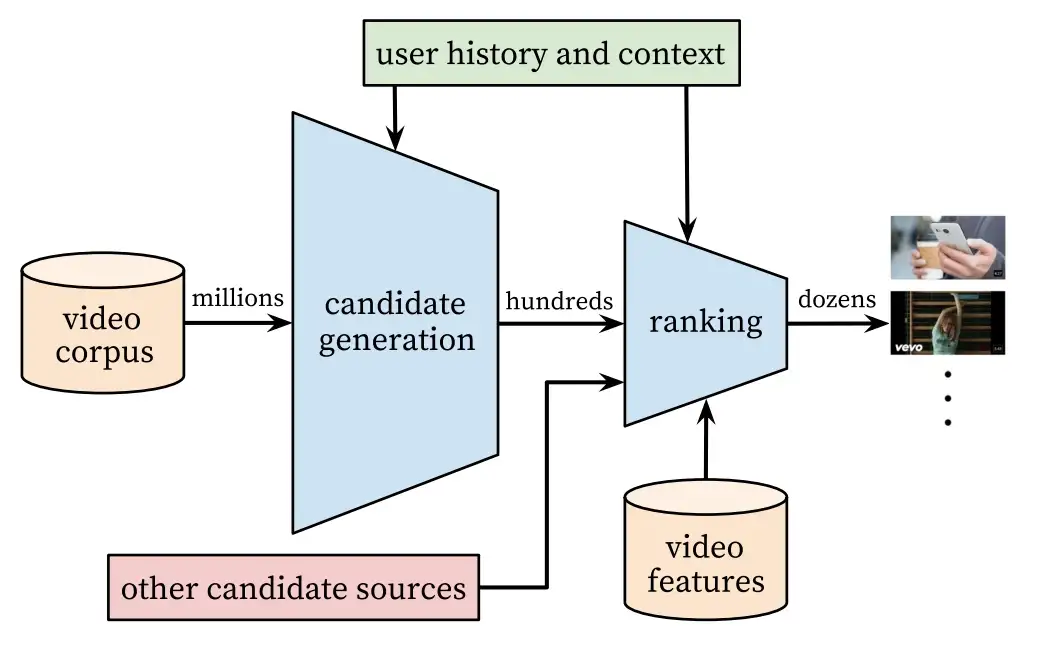

In [8]:
EMBEDDING_DIMS = 16 
DENSE_UNITS = 64   
MOVIE_NUM = movies['movieId'].max()
LEARNING_RATE = 0.003
BATCH_SIZE = 64


class Avg_Embedding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Avg_Embedding, self).__init__(**kwargs)

    def call(self, input):
        return tf.reduce_mean(input, axis=1)
    

input_watched_movies = tf.keras.Input(shape=(None, ), name='watched_movies')
input_occupation = tf.keras.layers.Input(shape=(1), name='occupation')
input_watched_genres= tf.keras.Input(shape=(None, ), name='watched_genres')
input_age = tf.keras.layers.Input(shape=(1), name='age')
input_gender = tf.keras.layers.Input(shape=(1), name='gender')
input_samples = tf.keras.Input(shape=(None, ), name='samples')


features_embedding_layer = tf.keras.layers.Embedding(input_dim = MOVIE_NUM+1, output_dim = EMBEDDING_DIMS, mask_zero=True, name='features_embedding')
average_embedding_layer = Avg_Embedding(name='features_embedding_average')


dense_1 = tf.keras.layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')
dense_2 = tf.keras.layers.Dense(EMBEDDING_DIMS, activation='relu', name='dense_2')

watched_movies_embedding = features_embedding_layer(input_watched_movies)
watched_genres_embedding = features_embedding_layer(input_watched_genres)
sample_movies_embedding = features_embedding_layer(input_samples)

average_embedding = average_embedding_layer(watched_movies_embedding)
average_embedding1 = average_embedding_layer( watched_genres_embedding)
concat_features = tf.keras.layers.concatenate([average_embedding,average_embedding1,  input_occupation, input_age, input_gender], axis=1, name='concatenate_features')
dense_1_out = dense_1(concat_features)
dense_2_out = dense_2(dense_1_out)
# 
dot_product = tf.keras.layers.dot([dense_2_out, sample_movies_embedding], axes=(1,2), name='dot_product')
output = tf.keras.layers.Activation('softmax', name = 'class_probabilities')(dot_product)

model = tf.keras.Model(inputs=[input_watched_movies, input_occupation, input_watched_genres, input_age, input_gender, input_samples], outputs=[output])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [10]:

history = model.fit([watched_movies_data, occupation_data,
                     watched_genres_data, 
                     age_data, gender_data, sample_data],
                    np.zeros(len(train_dataset),dtype=int),
                    batch_size=BATCH_SIZE,
                    epochs=70)

Epoch 1/70
8092/8092 [==============================] - 49s 6ms/step - loss: 0.6774 - acc: 0.7253
Epoch 2/70
8092/8092 [==============================] - 52s 6ms/step - loss: 0.6776 - acc: 0.7260
Epoch 3/70
8092/8092 [==============================] - 38s 5ms/step - loss: 0.6774 - acc: 0.7265
Epoch 4/70
8092/8092 [==============================] - 35s 4ms/step - loss: 0.6772 - acc: 0.7256
Epoch 5/70
8092/8092 [==============================] - 38s 5ms/step - loss: 0.6771 - acc: 0.7261
Epoch 6/70
8092/8092 [==============================] - 34s 4ms/step - loss: 0.6767 - acc: 0.7257
Epoch 7/70
8092/8092 [==============================] - 31s 4ms/step - loss: 0.6774 - acc: 0.7264
Epoch 8/70
8092/8092 [==============================] - 32s 4ms/step - loss: 0.6779 - acc: 0.7258
Epoch 9/70
8092/8092 [==============================] - 37s 5ms/step - loss: 0.6778 - acc: 0.7255
Epoch 10/70
8092/8092 [==============================] - 33s 4ms/step - loss: 0.6778 - acc: 0.7257
Epoch 11/70
8092/80

In [12]:
model.save(r'C:\Users\mirza\wzrdtls\neumf')

INFO:tensorflow:Assets written to: C:\Users\mirza\wzrdtls\neumf\assets


In [13]:
model= keras.models.load_model(r'C:\Users\mirza\wzrdtls\neumf')

<IPython.core.display.Javascript object>

In [14]:
def pick_user_data_input(ratings, userId, watched_sample_num = wathed_data_size):
    if len(ratings[ratings.userId == userId]) >= watched_sample_num:
        watched_movies_data = ratings[ratings.userId == userId]['movieId'].sample(n=watched_sample_num).to_numpy().reshape(-1,watched_sample_num)
    else:
        #watched_movies_data = rating_data[rating_data.user_id == user_id]['movie_id'].sample(n=watched_sample_num, replace=True).to_numpy().reshape(-1,watched_sample_num)
        watched_movies_data = tf.keras.preprocessing.sequence.pad_sequences(ratings[ratings.userId == userId]['movieId'].to_numpy().reshape(-1,1), maxlen=watched_sample_num)

    occupation_data = users[users.userId == userId]['occupation'].to_numpy().reshape(-1,1)
    
    if len(ratings[ratings.userId == userId]) >= watched_sample_num:
        watched_genres_data = train_dataset[train_dataset.userId == userId]['genres'].sample(n=watched_sample_num, replace=True).to_numpy().reshape(-1,watched_sample_num)
    else:
        #watched_movies_data = rating_data[rating_data.user_id == user_id]['movie_id'].sample(n=watched_sample_num, replace=True).to_numpy().reshape(-1,watched_sample_num)
        watched_genres_data = tf.keras.preprocessing.sequence.pad_sequences(train_dataset[train_dataset == userId]['genres'].to_numpy().reshape(-1,1), maxlen=watched_sample_num)
    
    
    age_data = users[users.userId == userId]['age'].apply(lambda x: (x - users['age'].min())/(users['age'].max() - users['age'].min())).to_numpy().reshape(-1,1)
    gender_data = users[users.userId == userId]['gender'].apply(lambda x : 0 if x=='M' else 1).to_numpy().reshape(-1,1)

    return [watched_movies_data, occupation_data, 
            watched_genres_data, 
            age_data, gender_data]


get_output = tf.keras.backend.function([model.get_layer('watched_movies').input,
                                        model.get_layer("occupation").input,
                                        model.get_layer("watched_genres").input,
                                        model.get_layer('age').input,
                                        model.get_layer('gender').input], [model.layers[-3].output])

embedding_table = model.get_layer('features_embedding').get_weights()[0]
print(embedding_table.shape)


(3953, 16)


In [15]:
pick = 26 
top_N_size = 50 

a = pick_user_data_input(ratings, pick)
pred = get_output(a)[0]
result = np.dot(pred, embedding_table.transpose())[0]
rank = sorted(range(len(result)), key=lambda k: result[k], reverse=True)


reco_data = pd.DataFrame(rank[:10], columns=['movieId'])
reco_data_array = rank[:10]


mov= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\movies.csv", sep = "::",
                   names = ["movieId", "title", "genres"])
mov["movieId"]= mov["movieId"].str.replace('[{}]'.format(string.punctuation), '')
mov["movieId"]= mov["movieId"].astype(int)


def fix(x, y ):
    titles = []
    genres = []
    
    for i in y:
        titles.append(mov[mov["movieId"]== i]["title"].values[0])
        genres.append(mov[mov["movieId"]== i]["genres"].values[0])
        
    x["title"] = pd.DataFrame(titles, columns=["title"])
    x["genres"] = pd.DataFrame(genres, columns=["genres"])
    x["userId"] = pick
    x.set_index(x.userId, drop=True, inplace=True)
    x.drop(columns=['userId'], inplace=True)
    return x

fix(reco_data,reco_data_array)

C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\2458082822.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mov= pd.read_csv(r"C:\Users\mirza\Desktop\dataset\MovieLens-1M\movies.csv", sep = "::",
C:\Users\mirza\AppData\Local\Temp\ipykernel_11756\2458082822.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  mov["movieId"]= mov["movieId"].str.replace('[{}]'.format(string.punctuation), '')


,movieId,title,genres
userId,,,
26,3927,Fantastic Voyage (1966),Adventure|Sci-Fi
26,3892,Anatomy (Anatomie) (2000),Horror
26,3916,Remember the Titans (2000),Drama
26,3931,"Giant Gila Monster, The (1959)",Horror|Sci-Fi
26,3886,Steal This Movie! (2000),Drama
26,3896,"Way of the Gun, The (2000)",Crime|Thriller
26,3905,"Specials, The (2000)",Comedy
26,3949,Requiem for a Dream (2000),Drama
26,3919,Hellraiser III: Hell on Earth (1992),Horror


In [16]:
# mean average precision

mAP_N = 0
display_freq = 10

for top_N in range(1, top_N_size+1):
    True_positive = test_rating_data[(test_rating_data.userId == pick) & (test_rating_data.movieId.isin(rank[:top_N]))]
    positive = test_rating_data[test_rating_data.userId == pick]

    random_pick = np.random.choice(len(movies), top_N)
    Random_positive = test_rating_data[(test_rating_data.userId == pick) & (test_rating_data.movieId.isin(random_pick))]
    
    if top_N % display_freq == 0 or top_N == 1:
        print(f'top N  = {top_N} -------------------\n')

        print(f'model  = Rank {top_N} Recall    : {len(True_positive)/len(positive)} ({len(True_positive)}/{len(positive)})')
        print(f'model  = Rank {top_N} Precision : {len(True_positive)/top_N} ({len(True_positive)}/{top_N})\n')


        print(f'random = Rank {top_N} Recall    : {len(Random_positive)/len(positive)} ({len(Random_positive)}/{len(positive)})')
        print(f'random = Rank {top_N} Precision : {len(Random_positive)/top_N} ({len(Random_positive)}/{top_N})\n')
    
    mAP_N += len(True_positive)/top_N
    
print(f'mAP@{top_N_size} = {mAP_N/top_N_size}')



top N  = 1 -------------------

model  = Rank 1 Recall    : 0.0 (0/400)
model  = Rank 1 Precision : 0.0 (0/1)

random = Rank 1 Recall    : 0.0 (0/400)
random = Rank 1 Precision : 0.0 (0/1)

top N  = 10 -------------------

model  = Rank 10 Recall    : 0.0 (0/400)
model  = Rank 10 Precision : 0.0 (0/10)

random = Rank 10 Recall    : 0.0025 (1/400)
random = Rank 10 Precision : 0.1 (1/10)

top N  = 20 -------------------

model  = Rank 20 Recall    : 0.0 (0/400)
model  = Rank 20 Precision : 0.0 (0/20)

random = Rank 20 Recall    : 0.0075 (3/400)
random = Rank 20 Precision : 0.15 (3/20)

top N  = 30 -------------------

model  = Rank 30 Recall    : 0.0 (0/400)
model  = Rank 30 Precision : 0.0 (0/30)

random = Rank 30 Recall    : 0.0125 (5/400)
random = Rank 30 Precision : 0.16666666666666666 (5/30)

top N  = 40 -------------------

model  = Rank 40 Recall    : 0.0 (0/400)
model  = Rank 40 Precision : 0.0 (0/40)

random = Rank 40 Recall    : 0.015 (6/400)
random = Rank 40 Precision : 0.15 (